## Initialization

In [2]:
import sys  

sys.path.insert(1, "./../../../../ESN-IP/SOURCES/.")

In [3]:
from Reservoir import Reservoir

In [4]:
vanilla_reservoir = Reservoir(N=100)

In [6]:
vanilla_reservoir.rescale_weights(0.95)

## Testing Intrinsic Metrics 

In [2]:
from Metrics import MC, MLLE, DeltaPhi, Neff

In [ ]:
MLLE().evaluate(vanilla_reservoir)

-0.30660075

In [ ]:
MC().evaluate(vanilla_reservoir)

tensor(9.0625)

In [ ]:
DeltaPhi().evaluate(vanilla_reservoir)

0.4069844273696027

In [ ]:
Neff().evaluate(vanilla_reservoir, transient=100)

2.194257512859631

## Testing Estrinsic Metrics

In [7]:
from DATA import MG17
from Metrics import MSE, NRMSE, MAE, ME
from ESN import EchoStateNetwork

In [8]:
data = MG17(split = True, percentages=[80,0,20])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

In [9]:
esn = EchoStateNetwork(vanilla_reservoir)

In [10]:
esn.train(X_TR, Y_TR)

Reservoir warmed up with the first 100 time steps


array([0.06559753, 0.10035706, 0.12561035, ..., 0.03529358, 0.04716492,
       0.05189514], dtype=float32)

In [11]:
y_pred = esn.predict(X_TS)

tensor(1.3101e-08, dtype=torch.float64)

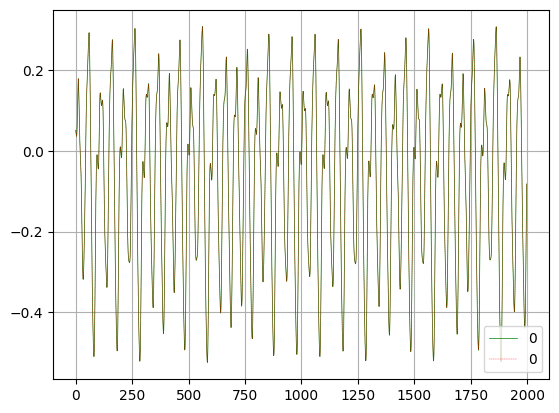

In [14]:
MSE(plot=True).evaluate(y_pred, Y_TS)

In [12]:
NRMSE(plot=False).evaluate(y_pred, Y_TS)

0.023629300995091376

In [13]:
MAE().evaluate(y_pred, Y_TS)

tensor(8.8957e-05, dtype=torch.float64)

In [15]:
ME().evaluate(y_pred, Y_TS)

tensor(7.2561e-06, dtype=torch.float64)